In [13]:
import pandas as pd
import numpy as np

**Loading Data**

In [14]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [15]:
len(train_data), len(test_data)

(8982, 2246)

In [16]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [17]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

In [18]:
train_labels[10]

3

**Data preparation**

In [19]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results
x_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

In [25]:
#I method
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)
#II method
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [26]:
test_labels

array([ 3, 10,  1, ...,  3,  3, 24])

In [27]:
one_hot_test_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

**Model construction**

In [28]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

**Model compilation and training**

In [30]:
model.compile(optimizer="rmsprop",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [31]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [33]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 357us/step - loss: 2.5729 - accuracy: 0.4846 - val_loss: 1.6973 - val_accuracy: 0.6710
Epoch 2/20
7982/7982 [==============================] - 1s 164us/step - loss: 1.3695 - accuracy: 0.7195 - val_loss: 1.2853 - val_accuracy: 0.7150
Epoch 3/20
7982/7982 [==============================] - 1s 119us/step - loss: 1.0144 - accuracy: 0.7878 - val_loss: 1.1011 - val_accuracy: 0.7640
Epoch 4/20
7982/7982 [==============================] - 1s 117us/step - loss: 0.7987 - accuracy: 0.8311 - val_loss: 1.0002 - val_accuracy: 0.7930
Epoch 5/20
7982/7982 [==============================] - 1s 116us/step - loss: 0.6303 - accuracy: 0.8688 - val_loss: 0.9502 - val_accuracy: 0.8060
Epoch 6/20
7982/7982 [==============================] - 1s 118us/step - loss: 0.5039 - accuracy: 0.8938 - val_loss: 0.8985 - val_accuracy: 0.8190
Epoch 7/20
7982/7982 [==============================] - 1s 117us/step - loss

**Plotting graphs**

Loss and val loss

In [37]:
history.history

{'val_loss': [1.6973004388809203,
  1.2852843074798583,
  1.1010661029815674,
  1.0002367238998413,
  0.9502315711975098,
  0.8984720826148986,
  0.881471152305603,
  0.8891734256744385,
  0.8756062679290771,
  0.9026438174247742,
  0.8898239374160767,
  0.9684098701477051,
  0.9505283269882202,
  0.9750025033950805,
  1.0713007850646972,
  0.984342248916626,
  1.0665699644088744,
  1.1174061050415038,
  1.0192780504226684,
  1.1102153463363647],
 'val_accuracy': [0.6710000038146973,
  0.7149999737739563,
  0.7639999985694885,
  0.7929999828338623,
  0.8059999942779541,
  0.8190000057220459,
  0.8199999928474426,
  0.8169999718666077,
  0.8220000267028809,
  0.8149999976158142,
  0.8209999799728394,
  0.8130000233650208,
  0.8190000057220459,
  0.8140000104904175,
  0.7760000228881836,
  0.8199999928474426,
  0.796999990940094,
  0.7870000004768372,
  0.8080000281333923,
  0.7979999780654907],
 'loss': [2.5728811455143332,
  1.3695003908697867,
  1.0144114415169478,
  0.798677599585405

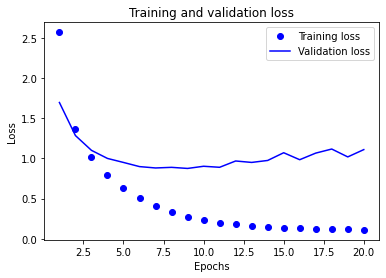

In [35]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label="Training loss")
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

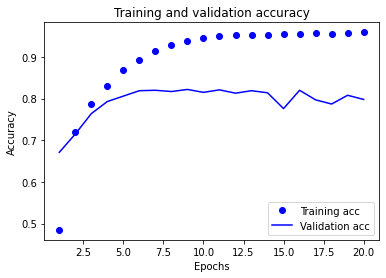

In [39]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(loss)+1)

plt.plot(epochs, acc, 'bo', label="Training acc")
plt.plot(epochs, val_acc, 'b', label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()